In [4]:
import pandas as pd
import numpy as np
from mypipes import *

In [5]:
file=pd.read_csv("C:\\Users\\Larry Williams\\Desktop\\Mamata\\Edvancer\\data\\data\\insurance.csv")

In [6]:
file.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
cat_vars=['sex','region','smoker']
num_vars=['age','bmi','children']

In [8]:
p1=pdPipeline([
    ('cat_select',VarSelector(cat_vars)),
    ('missing_trt',DataFrameImputer()),
    ('create_dummies',get_dummies_Pipe(15))
])

p2=pdPipeline([
    ('num_select',VarSelector(num_vars)),
    ('missing_trt',DataFrameImputer())
])

data_pipe=FeatureUnion([
    ('cat_pipe',p1),
    ('num_pipe',p2)
])

In [9]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(file),
                     columns=data_pipe.get_feature_names())

In [10]:
y_train=file['charges']

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

In [12]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## Decision Trees

In [13]:
params={ 
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [14]:
reg=DecisionTreeRegressor()

In [15]:
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=params,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

In [16]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='

In [17]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2581.23389 (std: 271.58805)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 5}

Model with rank: 2
Mean validation score: -2631.75000 (std: 284.48582)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5}

Model with rank: 3
Mean validation score: -2645.30744 (std: 269.05048)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5}

Model with rank: 4
Mean validation score: -2674.02743 (std: 310.73332)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 50}

Model with rank: 5
Mean validation score: -2680.16083 (std: 295.29210)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 20, 'max_depth': 10}



## Random Forest


In [18]:
param_dist = {"n_estimators":[50,100,200],
              "max_features": [2,4,5,6,8],
              "bootstrap": [True, False],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [19]:
reg=RandomForestRegressor()

In [20]:
n_iter_search = 10
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1387s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  20 tas

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [21]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2479.32841 (std: 238.55512)
Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 50, 'bootstrap': False}

Model with rank: 2
Mean validation score: -2500.37724 (std: 279.81446)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 5, 'bootstrap': True}

Model with rank: 3
Mean validation score: -2525.07120 (std: 257.53538)
Parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 6, 'max_depth': 70, 'bootstrap': False}

Model with rank: 4
Mean validation score: -2532.19119 (std: 256.33907)
Parameters: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 10, 'bootstrap': True}

Model with rank: 5
Mean validation score: -2578.54330 (std: 301.39852)
Parameters: {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 20, 'max_feature

## Extra Trees

In [22]:
param_dist = {"n_estimators":[50,100,200],
              "max_features": [2,4,5,6,8],
              "bootstrap": [True, False],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [23]:
reg=ExtraTreesRegressor()

In [24]:
n_iter_search = 10
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=Fals...
                   iid=

In [25]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2538.18405 (std: 209.39171)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 10, 'bootstrap': False}

Model with rank: 2
Mean validation score: -2688.74050 (std: 207.25229)
Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 6, 'max_depth': None, 'bootstrap': True}

Model with rank: 3
Mean validation score: -2859.63749 (std: 266.50254)
Parameters: {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 50, 'bootstrap': True}

Model with rank: 4
Mean validation score: -2935.80091 (std: 243.24167)
Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': 30, 'bootstrap': True}

Model with rank: 5
Mean validation score: -2963.71322 (std: 250.25544)
Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features

## Feature Importance for extratrees 
#### can be doen for other algos the same as well

In [26]:
et=random_search.best_estimator_
et.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=10, max_features=8, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=200, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [27]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':et.feature_importances_})

feat_imp_df.sort_values('importance',ascending=False)

,features,importance
4,cat_pipe__smoker_no,0.681827
6,num_pipe__bmi,0.163509
5,num_pipe__age,0.119714
7,num_pipe__children,0.015097
0,cat_pipe__sex_male,0.005395
1,cat_pipe__region_southeast,0.005232
3,cat_pipe__region_northwest,0.005145
2,cat_pipe__region_southwest,0.004079


## Partial Dependence Plot for Extratrees



In [28]:
%matplotlib inline

In [29]:
var_name='num_pipe__bmi'

preds=et.predict(x_train)


In [30]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

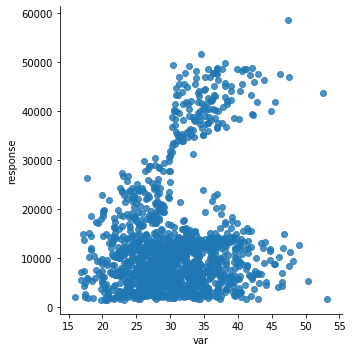

In [31]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [32]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

# smooth_data

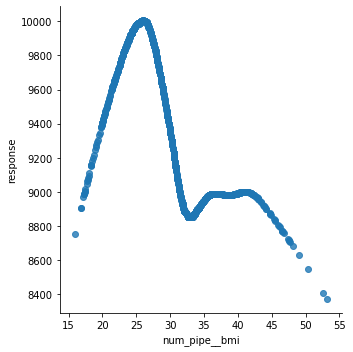

In [33]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)